In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks//Data Mining/full_data_after_Discretization.csv'  

df = pd.read_csv(file_path, index_col=0)
df_one_hot = pd.get_dummies(df, drop_first=True)


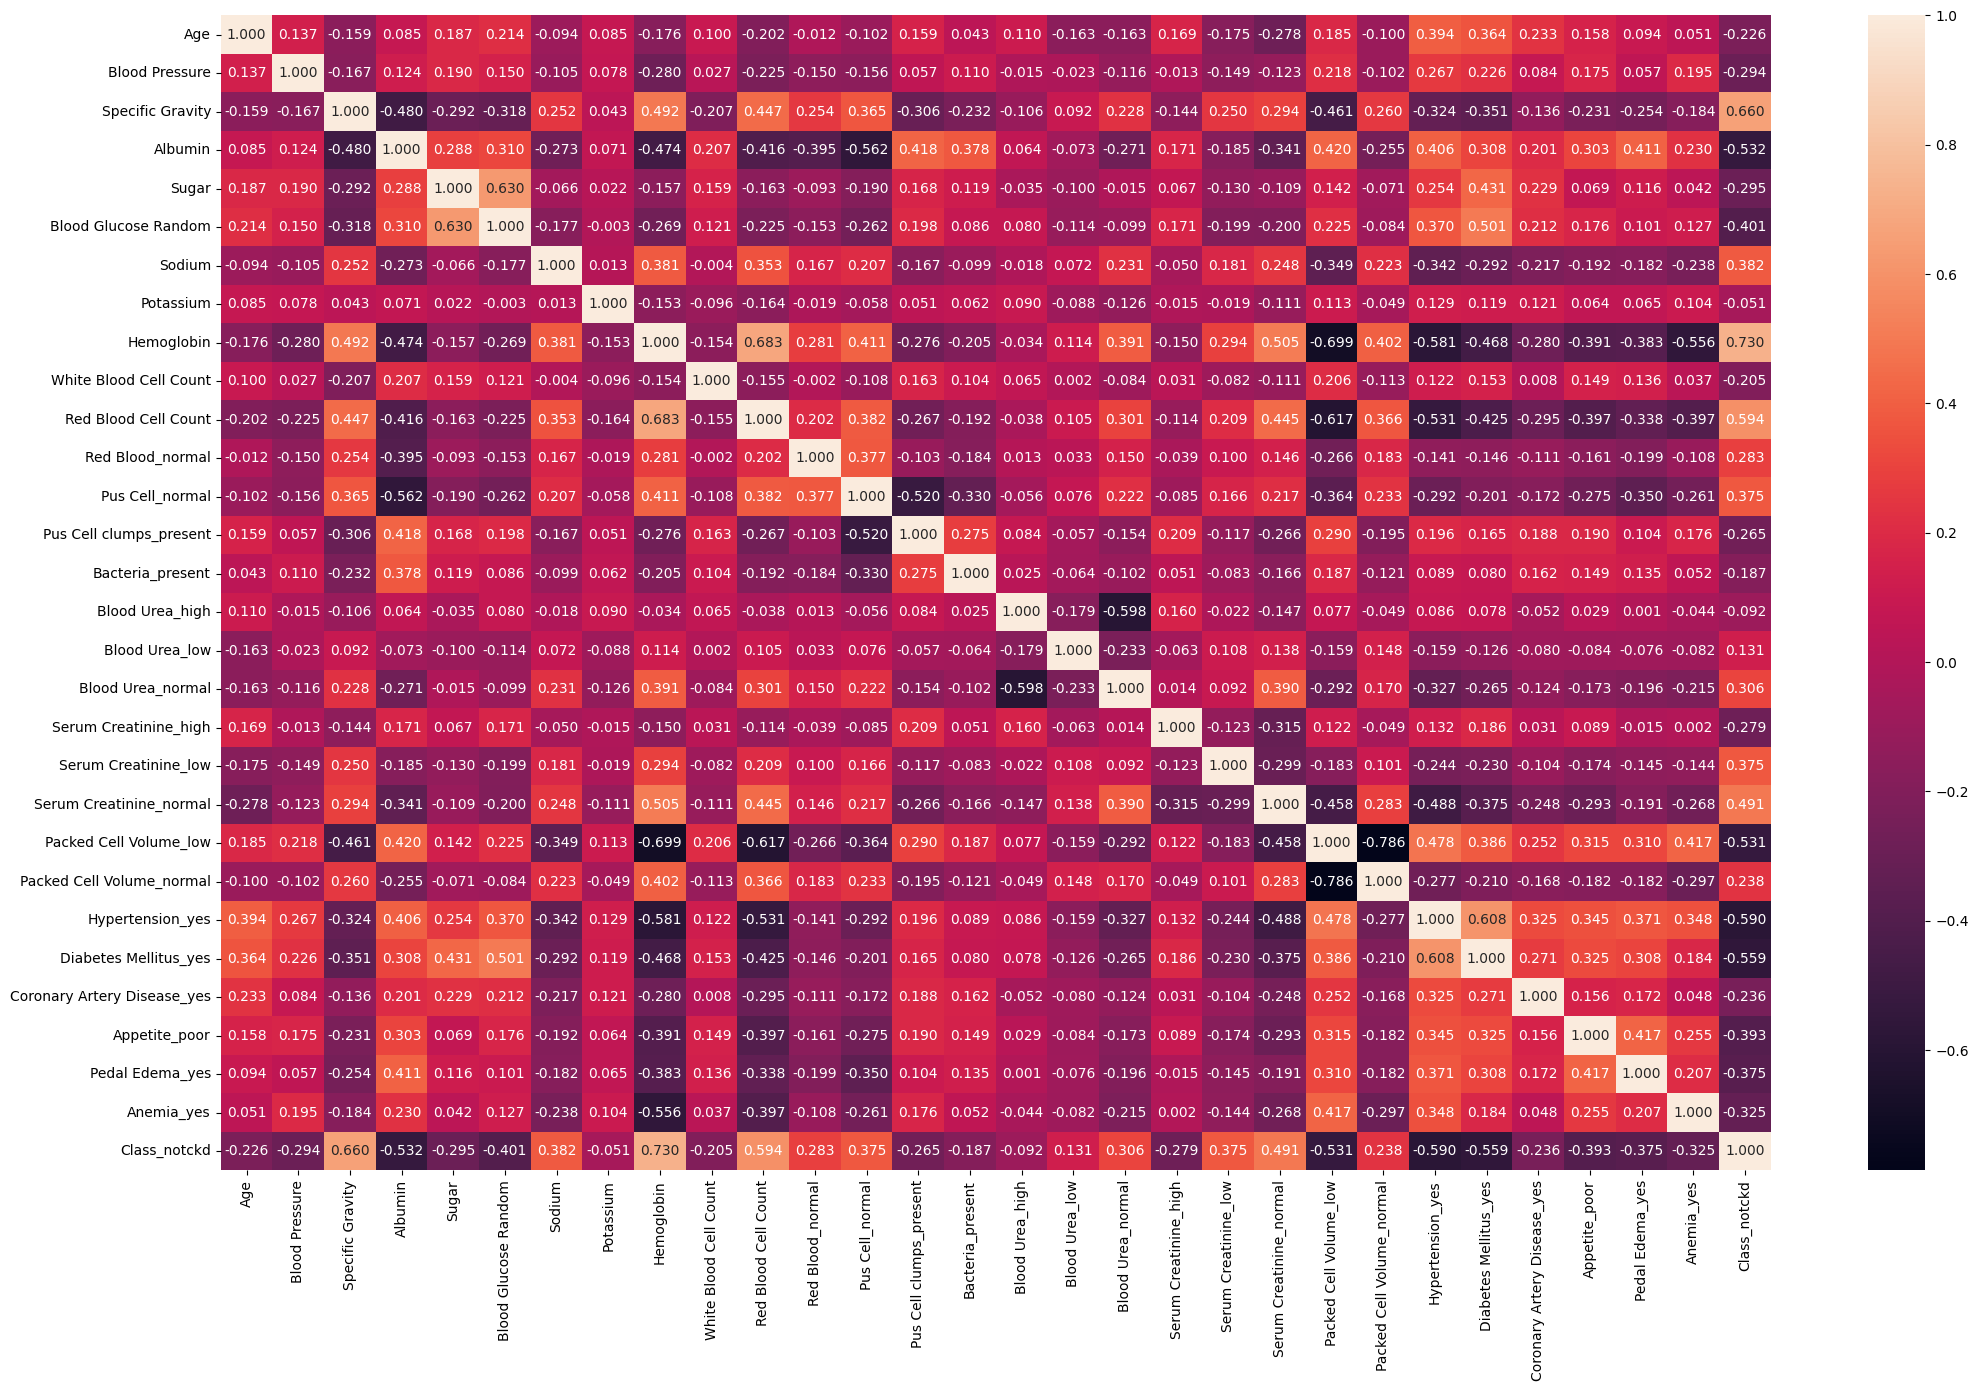

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,15))
corr_matrix = df_one_hot.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.show()

# **Split the Data to train set and test set**

In [ ]:
## data_after_Discretization ##

X, y = df[df.columns[:-1]], df[df.columns[-1]]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train with GaussianNB and Predict

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
score = gnb.score(X_train,y_train)
y_pred_gnb = gnb.predict(X_test) 
print('score: ',score)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_gnb)*100) 
print('\nConfusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred_gnb))
print('\nSummary: \n', metrics.classification_report(y_test, y_pred_gnb))

score:  0.9776119402985075
Accuracy:  96.96969696969697

Confusion Matrix: 
 [[78  4]
 [ 0 50]]

Summary: 
               precision    recall  f1-score   support

         ckd       1.00      0.95      0.97        82
      notckd       0.93      1.00      0.96        50

    accuracy                           0.97       132
   macro avg       0.96      0.98      0.97       132
weighted avg       0.97      0.97      0.97       132



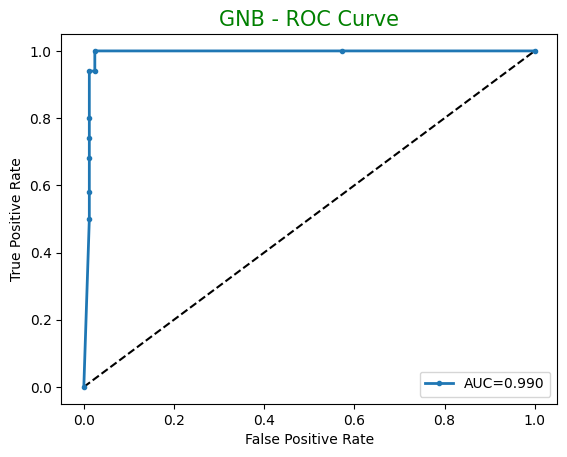

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

y_pred = gnb.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='notckd')
auc = roc_auc_score(y_test, y_pred)


plt.plot([0,1],[0,1],'k--')

plt.plot(fpr, tpr, marker='.', label='AUC={0:.3f}'.format(auc), linewidth=2)


plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.legend()
plt.title('GNB - ROC Curve', size=15, color='green');

# Train with KNN and Predict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [ ]:
""" Normalize the attribute values """
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

""" p=1 --> d() = manhattan_dist(),   p=2 --> d() = euclidean_dist() """
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1)                  
knn.fit(X_train_norm, y_train)
knn_score = knn.score(X_train_norm,y_train)
""" Prediction """
knn_y_pred = knn.predict(X_test_norm)
print('score: ', knn_score)
print('Accuracy: ', metrics.accuracy_score(y_test, knn_y_pred)*100) 
print('\nConfusion Matrix: \n', metrics.confusion_matrix(y_test, knn_y_pred))
print('\nSummary: \n', metrics.classification_report(y_test, knn_y_pred))


score:  1.0
Accuracy:  96.96969696969697

Confusion Matrix: 
 [[78  4]
 [ 0 50]]

Summary: 
               precision    recall  f1-score   support

         ckd       1.00      0.95      0.97        82
      notckd       0.93      1.00      0.96        50

    accuracy                           0.97       132
   macro avg       0.96      0.98      0.97       132
weighted avg       0.97      0.97      0.97       132



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


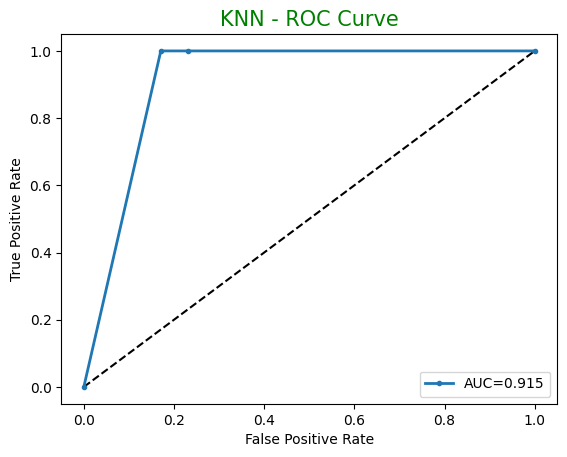

In [ ]:
y_pred1 = knn.predict_proba(X_test)
y_pred1 = y_pred1[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='notckd')
auc = roc_auc_score(y_test, y_pred1)


plt.plot([0,1],[0,1],'k--')

plt.plot(fpr, tpr, marker='.', label='AUC={0:.3f}'.format(auc), linewidth=2)


plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.legend()
plt.title('KNN - ROC Curve', size=15, color='green');